## Different functions to calculate a partial derivative equation


Here are different methods for how to calculate an equation in partial derivatives when it is difficult to solve or impossible doing it by approximation

In [25]:
from numpy import *
from pylab import *

class EDOS:
    
    def __init__(self,x_i,y_i,omega):
        
        #Intial values known in the EDOS
        self.valoresx = [x_i]
        self.valoresy = [y_i]
        
        self.omega = omega
  


    #EDOS equation to solve
    def funcion(self,x,y):
        
        deriv = zeros(2)
        
        deriv[0] = y[1]
        deriv[1] = -1.0*self.omega**2*y[0]
        
        return deriv
    
    
    
    #Function for Euler Method 
    def metodoEuler(self,h):       
                 
        contador = 0
                 
        for j in arange (0,3,0.01):
            
            self.valoresx.append(self.valoresx[contador] + h)
            self.valoresy.append(self.valoresy[contador] + h*self.funcion(self.valoresx[contador],self.valoresy[contador]))
            
            contador += 1
        
        return array(self.valoresx),array(self.valoresy)
    
    
    
    #Function Modified Euler Method
    def metodoEulerMejorado(self,h):
        
        contador = 0
        
        for j in arange (0,3,0.01):
            
            self.valoresx.append(self.valoresx[contador] + h)
            
            y_o = self.valoresy[contador] + h*self.funcion(self.valoresx[contador],self.valoresy[contador])
            self.valoresy.append(self.valoresy[contador] + h/2*(self.funcion(self.valoresx[contador],self.valoresy[contador]) + self.funcion(self.valoresx,y_o)))                                        
            
            contador += 1
            
        return array(self.valoresx),array(self.valoresy)
    
    
    #Function for Improved Euler Method
    def metodoEulerModificado(self,h):
        
        contador = 0
        
        for j in arange (0,3,0.01):
            
            self.valoresx.append(self.valoresx[contador] + h)
            
            y_o = self.valoresy[contador] + h/2*self.funcion(self.valoresx[contador],self.valoresy[contador])
            self.valoresy.append(self.valoresy[contador] + h*self.funcion(h/2+self.valoresx[contador],y_o))
            
            contador += 1
            
        return array(self.valoresx),array(self.valoresy)
    
    #Function for the Runge-Kutta Method
    def metodoRungeKutta(self,h):
        
        contador = 0
        
        for j in arange (0,3,0.01):
            
            k1 = self.funcion(self.valoresx[contador],self.valoresy[contador]) #K1
            k2 = self.funcion(self.valoresx[contador] + 1/2*h,self.valoresy[contador] + 1/2*h*k1) #K2
            k3 = self.funcion(self.valoresx[contador] + 1/2*h,self.valoresy[contador] + 1/2*h*k2) #K3
            k4 = self.funcion(self.valoresx[contador] + h,self.valoresy[contador] + h*k3) #K4
            
            self.valoresx.append(self.valoresx[contador] + h)
            self.valoresy.append(self.valoresy[contador] + h/6*(k1 + 2*k2 + 2*k3 + k4))
            
            contador += 1
            
        
        return array(self.valoresx),array(self.valoresy)
    

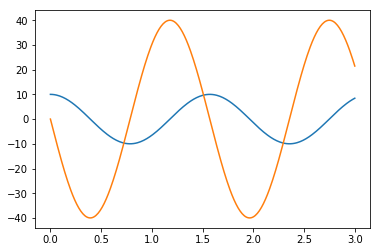

In [26]:
y_i = array([10.0,0.0])
ecuacion1 = EDOS(0.0,y_i,4.0)

#x,y = ecuacion1.metodoEuler(0.01)
#x,y = ecuacion1.metodoEulerMejorado(0.01)
#x,y = ecuacion1.metodoEulerModificado(0.01)
x,y = ecuacion1.metodoRungeKutta(0.01)

plot(x,y)

show()